<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab5_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/DATA (1).csv')
data.head(5)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [6]:
data.columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [7]:
# Drop identifier columns
data = data.drop(columns=['STUDENT ID', 'COURSE ID'])

In [8]:
data.isnull().sum()

,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


In [10]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means clustering with hyperparameter tuning

In [11]:
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))


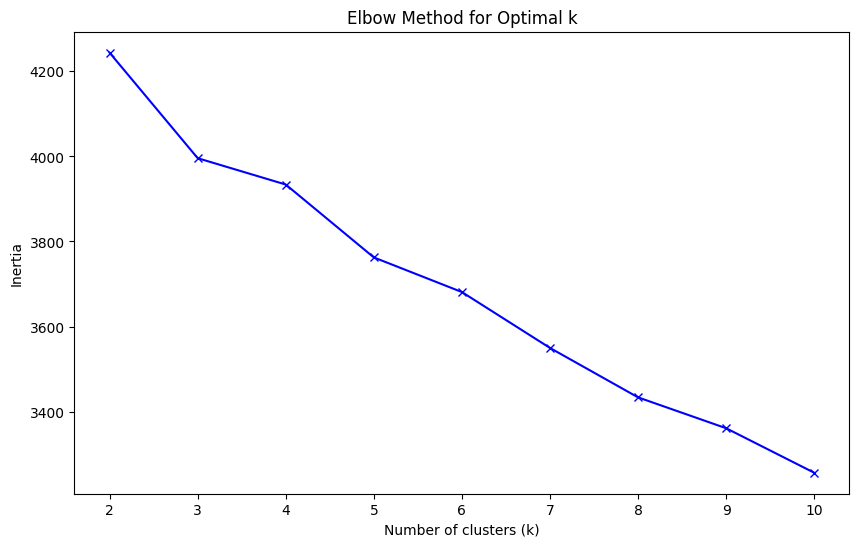

In [13]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

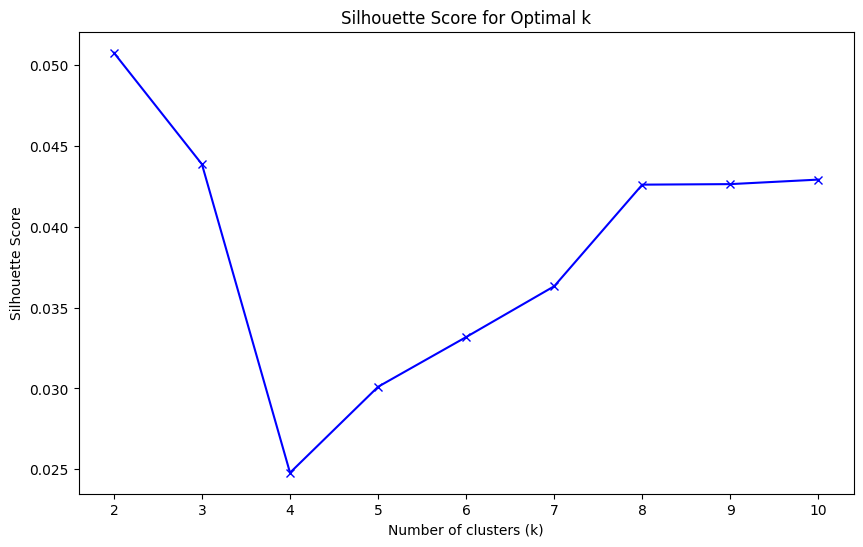

In [14]:
# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [15]:
# Select the best k based on silhouette score or elbow method
optimal_k = sil_scores.index(max(sil_scores)) + 2

# Train KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(scaled_data, clusters)
davies_bouldin = davies_bouldin_score(scaled_data, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.050762880348642195
Davies-Bouldin Index: 4.0480546637858845


the score of 0.05 is quite low, indicating that the clusters may be poorly separated, and some data points are close to the decision boundary between clusters.

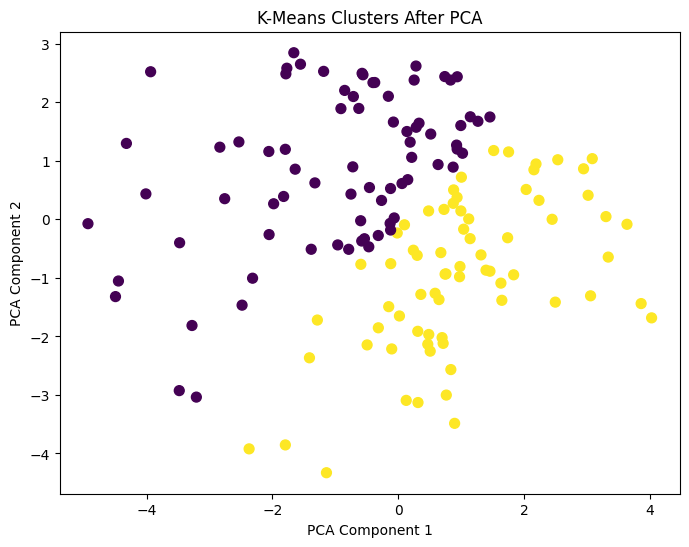

Silhouette Score after PCA: 0.3048626811973275
Davies-Bouldin Index after PCA: 1.2493728239324249


In [16]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Plot the clusters in PCA-reduced space
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title('K-Means Clusters After PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Evaluate clustering performance after PCA
silhouette_avg_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)

print(f'Silhouette Score after PCA: {silhouette_avg_pca}')
print(f'Davies-Bouldin Index after PCA: {davies_bouldin_pca}')


A score of 0.30 is much better than the previous score of 0.05. While not perfect (a score above 0.5 is typically considered very good), this indicates that your clusters are now better separated, and the data points are closer to the centers of their clusters compared to before.

The Davies-Bouldin Index has also improved drastically from 4.048 to 1.249, indicating much better separation between clusters and reduced overlap.

PCA helped to reduce dimensionality and focus on the most important components of the dataset, which led to clearer and better-defined clusters.

The dataset's segmentation into two clusters likely reflects two broad categories of students.
* Cluster 1: High-Performing Students
* Cluster 2: Lower-Performing or Struggling Students

 Grouping students into two distinct clusters simplifies decision-making. Instead of handling multiple segments, educators and administrators can focus on two clear strategies—supporting high-performing students and aiding struggling ones.

 * easily allocate resources